# YOLOv8 Object Detection

---

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Jan 19 14:48:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/cli.py", line 148, in entrypoint
    cli(cfg)
  File "/usr/local/lib/python3.8/dist-packages/ultralytics/yolo/cli.py", line 82, in cli
    raise SyntaxError(f"yolo mode={mode} is invalid. Valid modes are: {', '.join(modes.keys())}\n{CLI_HELP_MSG}")
SyntaxError: yolo mode=checks is invalid. Valid modes are: train, val, predict, export

    YOLOv8 CLI Usage examples:

    1. Install the ultralytics package:

        pip install ultralytics

    2. Train, Val, Predict and Export using 'yolo' commands:

            yolo TASK MODE ARGS

            Where   TASK (optional) is one of [detect, segment, classify]
                    MODE (required) is one of [train, val, predict, export]
                    ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                

In [ ]:
# Git clone

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e ultralytics

# from IPython import display
# display.clear_output()
# !yolo mode=checks

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml    epochs=1 ...
            ...           ...           ...
          segment        predict        yolov8n-seg.pt
          classify        val           yolov8n-cls.pt
```

## Dataset

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="AJjZZ7hXJTmym1Bbvi9a")
project = rf.workspace("maiz14").project("maiz14")
dataset = project.version(3).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentry-sdk 1.13.0 requires urllib3>=1.26.11; python_version >= "3.6", but you have urllib3 1.26.6 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Maiz14-3 in yolov8:: 100%|██████████| 1606/1606 [00:00<00:00, 1620.93it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/Maiz14-3/data.yaml epochs=200 imgsz=640 

/content
100% 49.7M/49.7M [00:00<00:00, 306MB/s]

Ultralytics YOLOv8.0.10 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Maiz14-3/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, si

In [8]:
%cd {HOME}
!cp -av runs /mydrive/yolov8/runs_m

/content
'runs' -> '/mydrive/yolov8/runs_m'
'runs/detect' -> '/mydrive/yolov8/runs_m/detect'
'runs/detect/train' -> '/mydrive/yolov8/runs_m/detect/train'
'runs/detect/train/weights' -> '/mydrive/yolov8/runs_m/detect/train/weights'
'runs/detect/train/weights/last.pt' -> '/mydrive/yolov8/runs_m/detect/train/weights/last.pt'
'runs/detect/train/weights/best.pt' -> '/mydrive/yolov8/runs_m/detect/train/weights/best.pt'
'runs/detect/train/args.yaml' -> '/mydrive/yolov8/runs_m/detect/train/args.yaml'
'runs/detect/train/events.out.tfevents.1674139905.15053d105bb7.3356.0' -> '/mydrive/yolov8/runs_m/detect/train/events.out.tfevents.1674139905.15053d105bb7.3356.0'
'runs/detect/train/results.csv' -> '/mydrive/yolov8/runs_m/detect/train/results.csv'
'runs/detect/train/train_batch0.jpg' -> '/mydrive/yolov8/runs_m/detect/train/train_batch0.jpg'
'runs/detect/train/train_batch1.jpg' -> '/mydrive/yolov8/runs_m/detect/train/train_batch1.jpg'
'runs/detect/train/train_batch2.jpg' -> '/mydrive/yolov8/runs_m/

In [9]:
%cd {HOME}
!cp -av datasets /mydrive/yolov8/datasets_m

/content
'datasets' -> '/mydrive/yolov8/datasets_m'
'datasets/Maiz14-3' -> '/mydrive/yolov8/datasets_m/Maiz14-3'
'datasets/Maiz14-3/data.yaml' -> '/mydrive/yolov8/datasets_m/Maiz14-3/data.yaml'
'datasets/Maiz14-3/README.dataset.txt' -> '/mydrive/yolov8/datasets_m/Maiz14-3/README.dataset.txt'
'datasets/Maiz14-3/README.roboflow.txt' -> '/mydrive/yolov8/datasets_m/Maiz14-3/README.roboflow.txt'
'datasets/Maiz14-3/test' -> '/mydrive/yolov8/datasets_m/Maiz14-3/test'
'datasets/Maiz14-3/test/images' -> '/mydrive/yolov8/datasets_m/Maiz14-3/test/images'
'datasets/Maiz14-3/test/images/m13-m14-0043_jpg.rf.0eb4e02a06dbe8c74fbc7ef73f525da6.jpg' -> '/mydrive/yolov8/datasets_m/Maiz14-3/test/images/m13-m14-0043_jpg.rf.0eb4e02a06dbe8c74fbc7ef73f525da6.jpg'
'datasets/Maiz14-3/test/images/m13-m14-0046_jpg.rf.9de63c453b938305b3d60428394481dd.jpg' -> '/mydrive/yolov8/datasets_m/Maiz14-3/test/images/m13-m14-0046_jpg.rf.9de63c453b938305b3d60428394481dd.jpg'
'datasets/Maiz14-3/test/images/m13-m14-0073_jpg.rf.d

In [10]:
! cd /content/gdrive/MyDrive

HOME = '/content/gdrive/MyDrive/yolov8'

print(HOME)

/content/gdrive/MyDrive/yolov8


In [11]:
!ls {HOME}/runs_m/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1674139905.15053d105bb7.3356.0  train_batch2.jpg
F1_curve.png					    train_batch8740.jpg
P_curve.png					    train_batch8741.jpg
PR_curve.png					    train_batch8742.jpg
predictions.json				    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    weights
results.png


/content/gdrive/MyDrive/yolov8


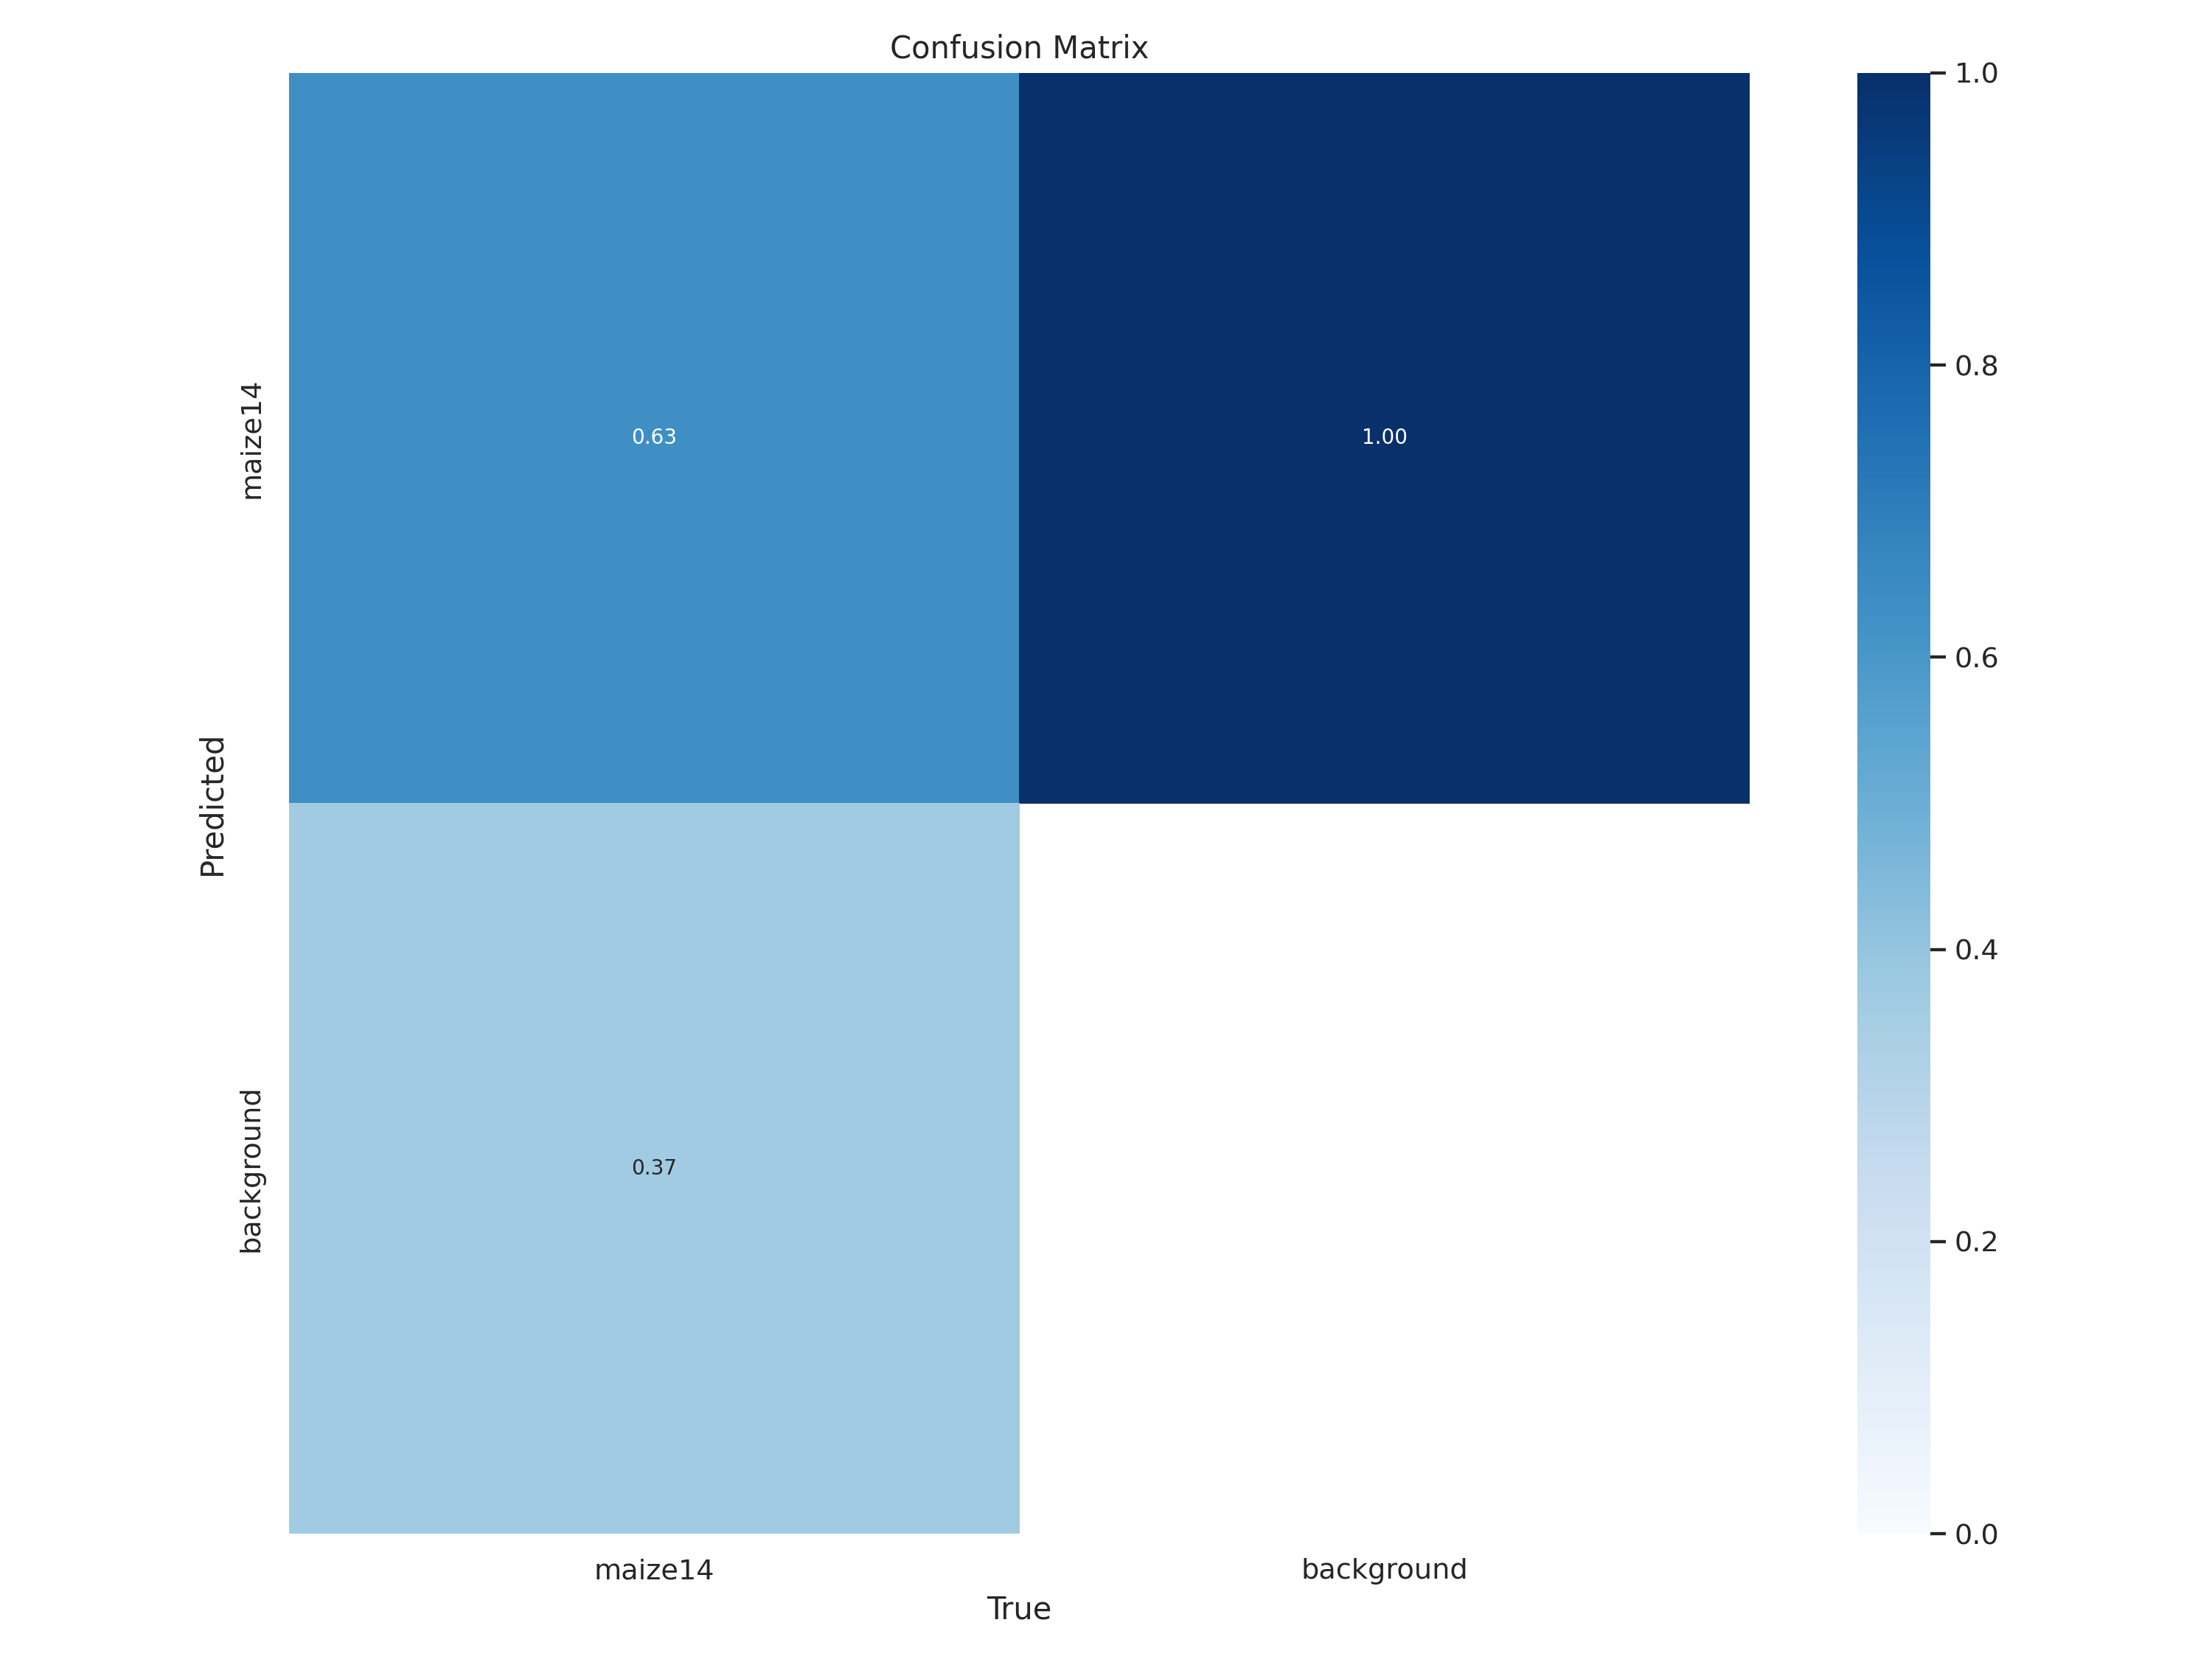

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs_m/detect/train/confusion_matrix.png', width=600)

/content/gdrive/MyDrive/yolov8


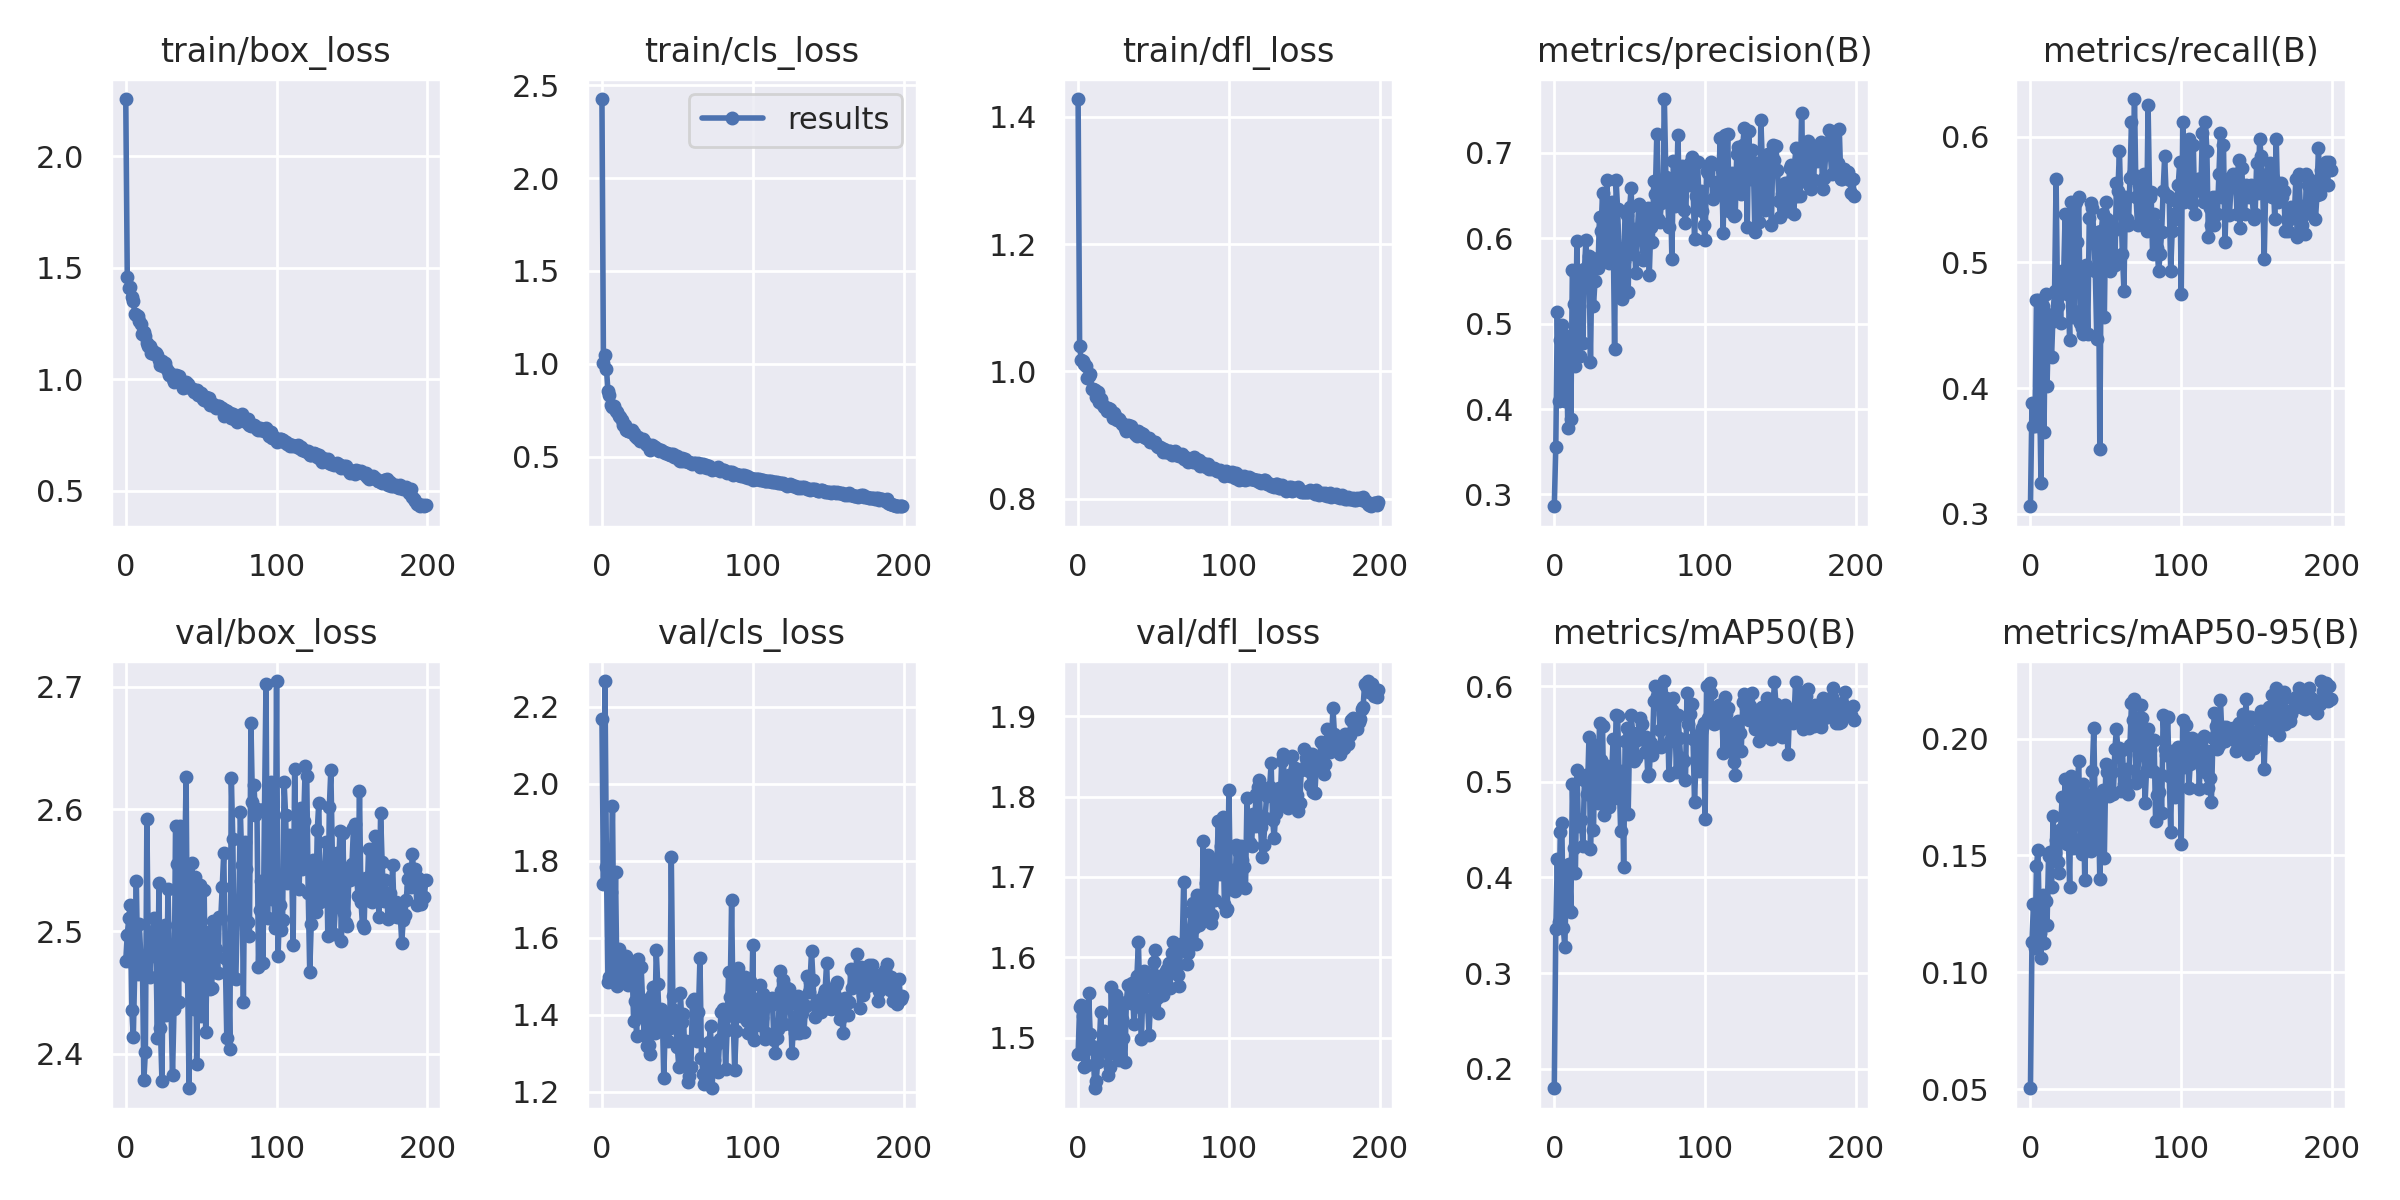

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs_m/detect/train/results.png', width=600)

/content/gdrive/MyDrive/yolov8


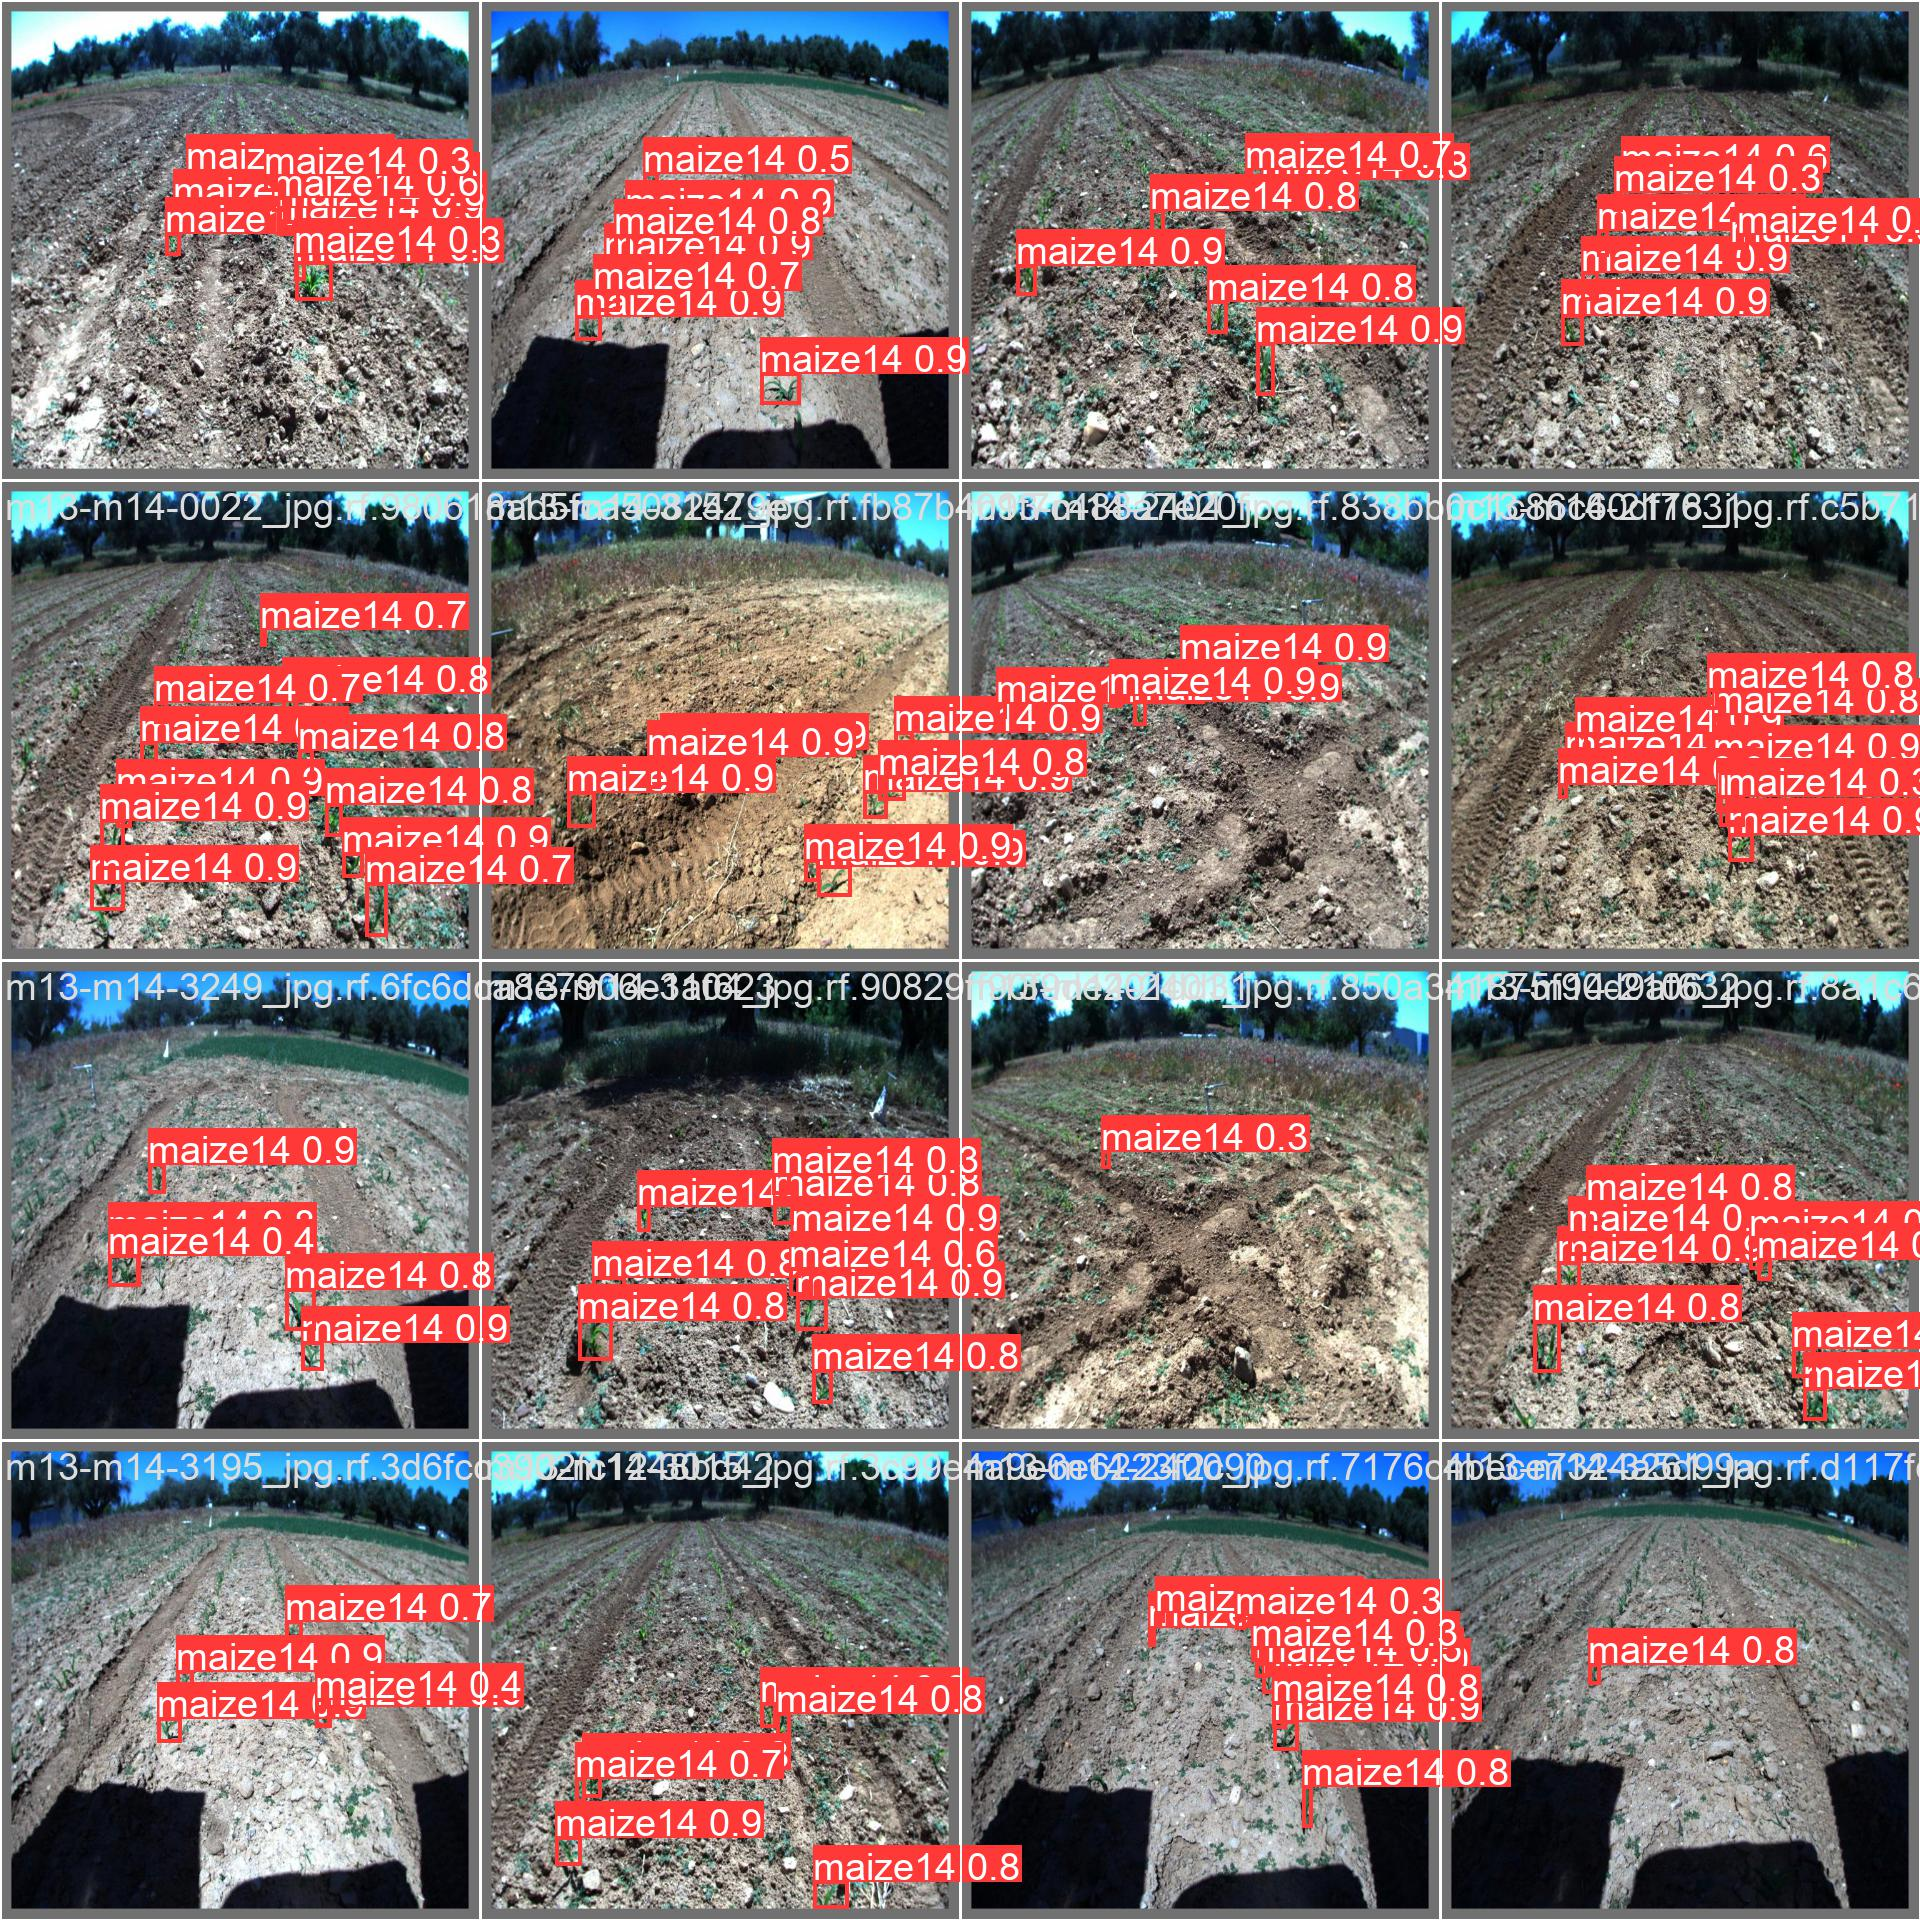

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs_m/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [15]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs_m/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/gdrive/MyDrive/yolov8
Ultralytics YOLOv8.0.10 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Maiz14-3/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.11s/it]
                   all         31        219      0.667      0.571      0.586      0.224
Speed: 0.3ms pre-process, 26.0ms inference, 0.0ms loss, 3.5ms post-process per image


## Inference with Custom Model

In [16]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs_m/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content/gdrive/MyDrive/yolov8
Ultralytics YOLOv8.0.10 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/31 /content/datasets/Maiz14-3/test/images/m13-m14-0043_jpg.rf.0eb4e02a06dbe8c74fbc7ef73f525da6.jpg: 640x640 10 maize14s, 38.1ms
image 2/31 /content/datasets/Maiz14-3/test/images/m13-m14-0046_jpg.rf.9de63c453b938305b3d60428394481dd.jpg: 640x640 11 maize14s, 38.2ms
image 3/31 /content/datasets/Maiz14-3/test/images/m13-m14-0073_jpg.rf.d3e6b46b12fb54acd5e44827745610d7.jpg: 640x640 10 maize14s, 28.2ms
image 4/31 /content/datasets/Maiz14-3/test/images/m13-m14-0218_jpg.rf.35f940bc1324f003b410084aa652d18a.jpg: 640x640 5 maize14s, 28.1ms
image 5/31 /content/datasets/Maiz14-3/test/images/m13-m14-0242_jpg.rf.a3e66b1c16807846e1409da04cfd8c8e.jpg: 640x640 5 maize14s, 28.2ms
image 6/31 /content/datasets/Maiz14-3/test/images/m13-m14-0245_jpg.rf.47b43c1e2b124f7dc9cc80e7370f94fa.jpg: 640x640 7 ma

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs_m/detect/predict3/*.jpg')[:1]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [20]:
project.version(3).deploy(model_type="yolov8", model_path=f"{HOME}/runs_m/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.